<a href="https://colab.research.google.com/github/ilafmakke/EDAcapston/blob/main/Capstone_Automated_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-75-0a37761f3687>:49: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Saving desciptive.csv to desciptive.csv
['desciptive.csv']
CSV file read successfully.
Columns available for plotting: ['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac', 'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid']
Enter column names to plot (comma-separated): Year, usg_apt
Enter plot type (line / scatter / bar): scatter


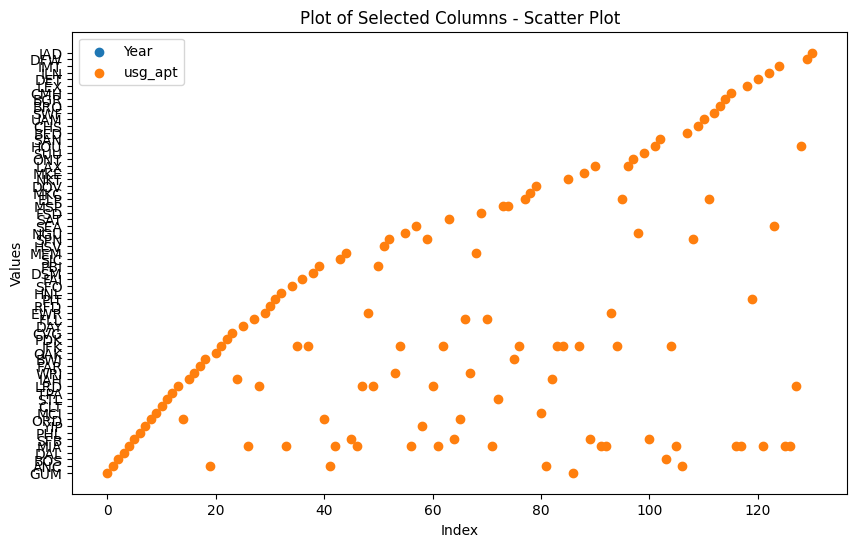

In [ ]:
from IPython.terminal.embed import Unicode
from google.colab import files
import csv
import io
import pandas as pd
import json
import sqlite3
!pip install matplotlib
from matplotlib import pyplot as plt
from collections import defaultdict
from google.colab import files
uploaded=files.upload()
# Get the list of uploaded filenames
uploaded_filenames = list(uploaded.keys())
import pandas as pd
# Print the list of filenames
print(uploaded_filenames)
uploaded_csv_content = uploaded[uploaded_filenames[0]]


# Prompt user for file path
filename = uploaded_filenames[0]
if filename.endswith('.csv'):
    data = pd.read_csv(filename)
    print("CSV file read successfully.")
elif filename.endswith('.xlsx') or filename.endswith('.xls'):
    data = pd.read_excel(filename)
    print("Excel file read successfully.")
elif filename.endswith('.json'):
    with open(filename, 'r') as file:
        data = json.load(file)
    print("JSON file read successfully.")
elif filename.endswith('.txt'):
    with open(filename, 'r') as file:
        data = file.read()
    print("Text file read successfully.")
elif filename.endswith('.db'):
    conn = sqlite3.connect(filename)
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM table_name')
    data = cursor.fetchall()
    conn.close()
    print("SQL database read successfully.")
else:
    print("Unsupported file format.")

# Handling missing values by replacing with means
if isinstance(data, pd.DataFrame):
    data.fillna(data.mean(), inplace=True)

    print("Columns available for plotting:", list(data.columns))
    columns_to_plot = input("Enter column names to plot (comma-separated): ").split(',')

    plot_type = input("Enter plot type (line / scatter / bar): ")

    plt.figure(figsize=(10, 6))

    for column in columns_to_plot:
        if column.strip() in data.columns:
            if plot_type == "line":
                plt.plot(data[column.strip()], label=column.strip())
            elif plot_type == "scatter":
                plt.scatter(data.index, data[column.strip()], label=column.strip())
            elif plot_type == "bar":
                plt.bar(data.index, data[column.strip()], label=column.strip())

    plt.xlabel("Index")
    plt.ylabel("Values")
    plt.title(f"Plot of Selected Columns - {plot_type.capitalize()} Plot")
    plt.legend()
    plt.show()
